In [1]:
import os
from pathlib import Path
import h5py
import warnings
import pandas as pd

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter, FixedLocator, ScalarFormatter, MultipleLocator

import seaborn as sns


c:\Users\P\anaconda3\envs\SYLAS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
folder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

#file_name1 = '20240119_OM_privat-19-02.h5'; privat_training = pd.read_csv(os.path.join(folder_path3, file_name1))

file_name1 = 'CondGANOpenMeterprivat_feature.csv'; syngan = pd.read_csv(os.path.join(folder_path2, file_name1))

file_name2 = 'ddpm_feature_2019_2021.csv'; synddpm = pd.read_csv(os.path.join(folder_path2, file_name2))

file_name3 = 'privat_test_origData_feature.csv'; original = pd.read_csv(os.path.join(folder_path2, file_name3))

In [9]:
synddpm = synddpm.drop(columns='feature', axis=1)

In [3]:
original

,001dce72-b1c1-44b1-bf16-0c22cfe3a420,00a3c3e4-bf1f-4c0b-9e18-8bc60e66575d,0252a8f5-9913-47bb-a70f-c86e5c69f71a,026ed97d-d51e-489a-898e-6547d6f569f2,02a7475b-9007-4aef-a265-b38bbdbbec32,0358067f-cd41-4d91-ba9e-91405fbfc704,037d3c0e-2c33-4705-a6a4-778ce0858c85,04b1dc78-587d-4837-978e-ac288a2b480c,0670c6d3-ba11-476c-aac5-c63e399e27c3,06d1421b-265b-4a13-a39f-6df00dbf92a6,...,fcf879e3-b960-4d3b-91eb-a7c9b7eab187,fd2ae52e-2db9-4a60-b2e7-1ed077734652,fd440cb5-d81e-40ee-9819-8395a61c3a35,fd53424d-2cfa-4a08-8010-98a2b1aec35f,fd7e5c52-ff8e-4806-9703-39402d395415,fe2d90e7-f54f-4b8b-8607-50b18091bd96,fe61333c-b60c-4500-bfa6-0b14db32d6d6,ff029d36-1c57-43fc-922f-2c148c3f6200,ff1e2a8b-cea3-4512-9144-e84263ca6afc,ffd9031e-4660-4018-889d-a3c1ddb65926
0,0.131073,0.068433,0.040833,0.076353,0.046445,0.113907,0.035786,0.036497,0.027153,0.056534,...,0.068637,0.118407,0.055325,0.076511,0.090153,0.130639,0.073295,0.014728,0.160884,0.043598
1,0.139671,0.063520,0.044016,0.072278,0.048791,0.111900,0.039618,0.032356,0.025400,0.062713,...,0.071906,0.118329,0.051941,0.076239,0.089037,0.120014,0.074485,0.011879,0.149183,0.047432
2,0.135149,0.065429,0.041669,0.072408,0.047962,0.116326,0.038197,0.029681,0.030747,0.060217,...,0.072461,0.116370,0.054409,0.075300,0.083318,0.124714,0.075312,0.015747,0.139713,0.041903
3,0.133644,0.066752,0.041894,0.072219,0.043589,0.109391,0.039908,0.038666,0.029054,0.064330,...,0.063378,0.117992,0.055280,0.075369,0.086894,0.121619,0.072609,0.015449,0.133895,0.046064
4,0.142335,0.067692,0.047776,0.069184,0.048544,0.113410,0.042837,0.039142,0.027334,0.054140,...,0.068655,0.117551,0.051106,0.085386,0.079180,0.129398,0.076876,0.014152,0.120480,0.045051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,0.000000,0.000000,3.764778,0.000000,2.161442,0.000000,8.962756,2.478901,0.000000,0.000000,...,3.787245,0.000000,4.648117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2033,0.000000,0.000000,0.000000,0.509380,0.000000,1.392560,0.000000,0.000000,0.000000,2.675997,...,0.000000,4.027911,0.000000,0.825071,1.543578,0.000000,0.000000,0.000000,0.696232,1.815503
2034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
list_of_dfs = [original, synddpm, syngan]  # assuming df1, df2, and df3 are your DataFrames

# Iterate over each DataFrame
for df in list_of_dfs:
    # Generate a list of integers for column names
    new_columns = list(range(len(df.columns)))
    
    # Rename columns with integers
    df.columns = new_columns

In [11]:
# Assuming 'df' is your DataFrame
synddpm = synddpm.add_prefix('syn_')
syngan = syngan.add_prefix('syn_')
original = original[original.columns[::-1]]

In [12]:
# Assuming df1 and df2 are your dataframes
columns_df1 = set(original.columns)
columns_df2 = set(syngan.columns)

# Checking if both dataframes have the same columns
if columns_df1 == columns_df2:
    print("Both dataframes have the same columns.")
else:
    print("The dataframes do not have the same columns.")
    
    # To find out which columns are different
    only_in_df1 = columns_df1 - columns_df2
    only_in_df2 = columns_df2 - columns_df1
    
    if only_in_df1:
        print("Columns only in df1:", only_in_df1)
    if only_in_df2:
        print("Columns only in df2:", only_in_df2)


The dataframes do not have the same columns.
Columns only in df1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208

In [7]:
#original = original.sample(frac=1, axis=1)

original = original[original.columns[::-1]]

In [13]:
original

,551,550,549,548,547,546,545,544,543,542,...,9,8,7,6,5,4,3,2,1,0
0,0.043598,0.160884,0.014728,0.073295,0.130639,0.090153,0.076511,0.055325,0.118407,0.068637,...,0.056534,0.027153,0.036497,0.035786,0.113907,0.046445,0.076353,0.040833,0.068433,0.131073
1,0.047432,0.149183,0.011879,0.074485,0.120014,0.089037,0.076239,0.051941,0.118329,0.071906,...,0.062713,0.025400,0.032356,0.039618,0.111900,0.048791,0.072278,0.044016,0.063520,0.139671
2,0.041903,0.139713,0.015747,0.075312,0.124714,0.083318,0.075300,0.054409,0.116370,0.072461,...,0.060217,0.030747,0.029681,0.038197,0.116326,0.047962,0.072408,0.041669,0.065429,0.135149
3,0.046064,0.133895,0.015449,0.072609,0.121619,0.086894,0.075369,0.055280,0.117992,0.063378,...,0.064330,0.029054,0.038666,0.039908,0.109391,0.043589,0.072219,0.041894,0.066752,0.133644
4,0.045051,0.120480,0.014152,0.076876,0.129398,0.079180,0.085386,0.051106,0.117551,0.068655,...,0.054140,0.027334,0.039142,0.042837,0.113410,0.048544,0.069184,0.047776,0.067692,0.142335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.648117,0.000000,3.787245,...,0.000000,0.000000,2.478901,8.962756,0.000000,2.161442,0.000000,3.764778,0.000000,0.000000
2033,1.815503,0.696232,0.000000,0.000000,0.000000,1.543578,0.825071,0.000000,4.027911,0.000000,...,2.675997,0.000000,0.000000,0.000000,1.392560,0.000000,0.509380,0.000000,0.000000,0.000000
2034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


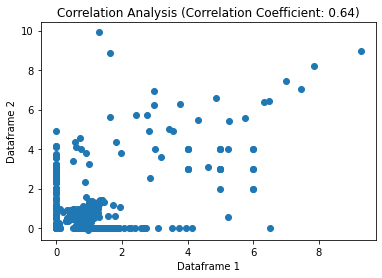

In [14]:
# Perform correlation analysis
correlation = original.iloc[:, 0].corr(syngan.iloc[:, 0])

# Plot the data
plt.scatter(original.iloc[:, 0], syngan.iloc[:, 0])
plt.title('Correlation Analysis (Correlation Coefficient: {:.2f})'.format(correlation))
plt.xlabel('Dataframe 1')
plt.ylabel('Dataframe 2')
plt.show()

c:\Users\P\anaconda3\envs\SYLAS\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


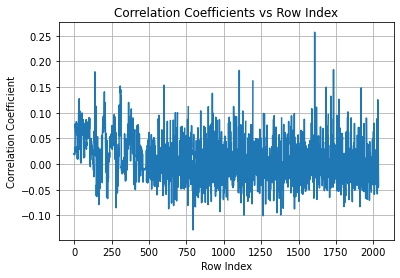

In [15]:
import pandas as pd
import numpy as np

# Assuming df1 and df2 are your dataframes

# Convert dataframes to numpy arrays for faster computation
array1 = original.to_numpy()
array2 = syngan.to_numpy()

# Calculate correlation coefficient for each pair of rows
correlation_coefficients = []
for row1, row2 in zip(array1, array2):
    correlation = np.corrcoef(row1, row2)[0, 1]
    correlation_coefficients.append(correlation)

# Convert the list of correlation coefficients to a pandas Series
correlation_series = pd.Series(correlation_coefficients)

# Plot the correlation coefficients against the row index
plt.plot(correlation_series)
plt.title('Correlation Coefficients vs Row Index')
plt.xlabel('Row Index')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


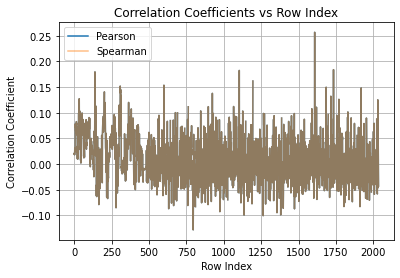

In [16]:
array1 = original.to_numpy()
array2 = syngan.to_numpy()

# Calculate Pearson and Spearman correlation coefficients for each pair of rows
pearson_correlation_coefficients = []
spearman_correlation_coefficients = []
for row1, row2 in zip(array1, array2):
    pearson_correlation = np.corrcoef(row1, row2)[0, 1]
    spearman_correlation = np.corrcoef(row1, row2, rowvar=False)[0, 1]  # Spearman correlation
    pearson_correlation_coefficients.append(pearson_correlation)
    spearman_correlation_coefficients.append(spearman_correlation)

# Convert the lists of correlation coefficients to pandas Series
pearson_series = pd.Series(pearson_correlation_coefficients, name='Pearson')
spearman_series = pd.Series(spearman_correlation_coefficients, name='Spearman')

# Plot the correlation coefficients against the row index
plt.plot(pearson_series, label='Pearson')
plt.plot(spearman_series, label='Spearman', alpha=0.5)
plt.title('Correlation Coefficients vs Row Index')
plt.xlabel('Row Index')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True)
plt.show()

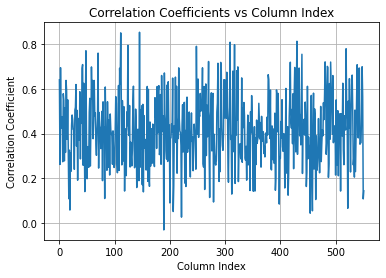

In [17]:
array1 = original.to_numpy()
array2 = syngan.to_numpy()

# Calculate correlation coefficient for each pair of rows for all columns
correlation_coefficients = []
for i in range(array1.shape[1]):  # Loop over each column
    correlation = np.corrcoef(array1[:, i], array2[:, i])[0, 1]
    correlation_coefficients.append(correlation)

# Convert the list of correlation coefficients to a pandas Series
correlation_series = pd.Series(correlation_coefficients)

# Plot the correlation coefficients against the column index
plt.plot(correlation_series)
plt.title('Correlation Coefficients vs Column Index')
plt.xlabel('Column Index')
plt.ylabel('Correlation Coefficient')
plt.grid(True)


In [18]:
import seaborn as sns

concatenated_df = pd.concat([original, syngan], axis=1)

# Calculate correlation matrix
correlation_matrix = concatenated_df.corr()

In [19]:
concatenated_df2 = pd.concat([original, synddpm], axis=1)

# Calculate correlation matrix
correlation_matrix2 = concatenated_df2.corr()

In [20]:
# Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

In [21]:
#correlation_matrix.to_parquet('correlation_matrix_syngan_original_statmetrics.parquet')

In [22]:
correlation_matrix

,551,550,549,548,547,546,545,544,543,542,...,syn_542,syn_543,syn_544,syn_545,syn_546,syn_547,syn_548,syn_549,syn_550,syn_551
551,1.000000,0.419747,0.609426,0.559807,0.544003,0.569672,0.183210,0.632694,0.551683,0.555566,...,0.349990,0.654070,0.689262,0.534323,0.387052,0.532485,0.711616,0.623179,0.160862,0.601031
550,0.419747,1.000000,0.285310,0.393064,0.353986,0.419978,0.021832,0.346577,0.429319,0.344745,...,0.025737,0.313369,0.215484,0.131498,0.132497,0.320138,0.412435,0.428924,0.050939,0.088780
549,0.609426,0.285310,1.000000,0.425029,0.495772,0.480924,0.315418,0.663002,0.509480,0.578190,...,0.642601,0.684781,0.730785,0.497279,0.657014,0.526341,0.689406,0.551789,0.014378,0.721527
548,0.559807,0.393064,0.425029,1.000000,0.426723,0.465197,0.157981,0.470812,0.536879,0.449361,...,0.255898,0.468410,0.434116,0.285834,0.323072,0.431649,0.522089,0.483890,0.103571,0.326456
547,0.544003,0.353986,0.495772,0.426723,1.000000,0.530297,0.122447,0.565486,0.450551,0.456462,...,0.209398,0.481699,0.448829,0.364179,0.276202,0.450621,0.558073,0.516897,0.071542,0.405680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
syn_547,0.532485,0.320138,0.526341,0.431649,0.450621,0.506743,0.231981,0.531226,0.504674,0.484211,...,0.391417,0.567029,0.547595,0.393521,0.442656,1.000000,0.614166,0.511460,0.109281,0.498537
syn_548,0.711616,0.412435,0.689406,0.522089,0.558073,0.598728,0.280311,0.683062,0.587189,0.596538,...,0.528130,0.724459,0.732262,0.560183,0.568221,0.614166,1.000000,0.670582,0.170583,0.674937
syn_549,0.623179,0.428924,0.551789,0.483890,0.516897,0.584922,0.175945,0.604993,0.529770,0.517752,...,0.275787,0.573744,0.563486,0.431784,0.370240,0.511460,0.670582,1.000000,0.100213,0.462581
syn_550,0.160862,0.050939,0.014378,0.103571,0.071542,0.124788,-0.010656,0.122432,0.073124,0.108465,...,0.050815,0.136765,0.179150,0.194777,-0.003588,0.109281,0.170583,0.100213,1.000000,0.127314


In [23]:
correlation_matrix2

,551,550,549,548,547,546,545,544,543,542,...,syn_542,syn_543,syn_544,syn_545,syn_546,syn_547,syn_548,syn_549,syn_550,syn_551
551,1.000000,0.419747,0.609426,0.559807,0.544003,0.569672,0.183210,0.632694,0.551683,0.555566,...,0.463774,0.520493,0.542780,0.239016,0.487419,0.510550,0.470001,0.453741,0.498312,0.563044
550,0.419747,1.000000,0.285310,0.393064,0.353986,0.419978,0.021832,0.346577,0.429319,0.344745,...,0.389021,0.448956,0.372274,0.130426,0.361536,0.413946,0.376979,0.200619,0.389843,0.337993
549,0.609426,0.285310,1.000000,0.425029,0.495772,0.480924,0.315418,0.663002,0.509480,0.578190,...,0.419353,0.426522,0.470255,0.219190,0.504073,0.477644,0.468734,0.589602,0.390828,0.500910
548,0.559807,0.393064,0.425029,1.000000,0.426723,0.465197,0.157981,0.470812,0.536879,0.449361,...,0.411823,0.473649,0.432410,0.179616,0.434919,0.437352,0.430654,0.319650,0.398877,0.447882
547,0.544003,0.353986,0.495772,0.426723,1.000000,0.530297,0.122447,0.565486,0.450551,0.456462,...,0.487113,0.551782,0.466158,0.188288,0.476837,0.439126,0.424915,0.385832,0.487831,0.499596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
syn_547,0.510550,0.413946,0.477644,0.437352,0.439126,0.458814,0.174438,0.495500,0.471898,0.465029,...,0.427518,0.437824,0.423394,0.247628,0.502003,1.000000,0.441429,0.346348,0.393251,0.509356
syn_548,0.470001,0.376979,0.468734,0.430654,0.424915,0.482973,0.158685,0.501370,0.454743,0.419333,...,0.433839,0.471398,0.479710,0.216045,0.429721,0.441429,1.000000,0.418595,0.472010,0.405641
syn_549,0.453741,0.200619,0.589602,0.319650,0.385832,0.382138,0.154730,0.478077,0.335773,0.448880,...,0.274098,0.271036,0.363564,0.045749,0.377098,0.346348,0.418595,1.000000,0.281881,0.377988
syn_550,0.498312,0.389843,0.390828,0.398877,0.487831,0.525100,0.090312,0.523947,0.455298,0.434090,...,0.549906,0.466864,0.424181,0.138606,0.445027,0.393251,0.472010,0.281881,1.000000,0.427643


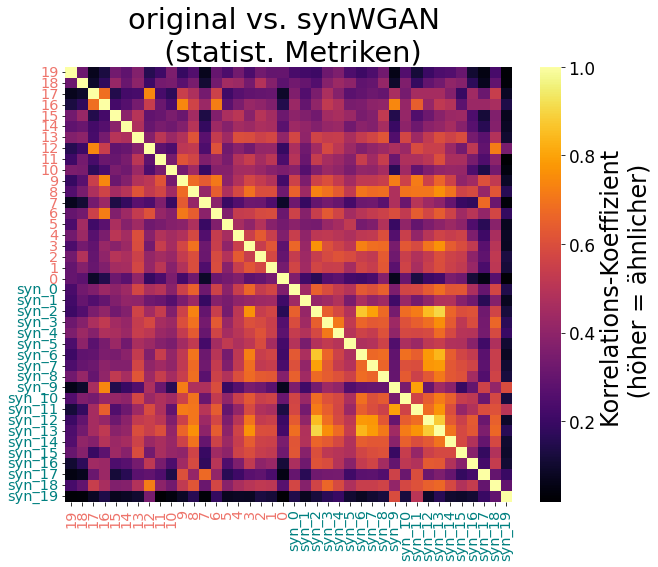

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

start = 532
range = 40
end_range = start + range

# Assuming correlation_matrix is your correlation matrix

# Select the first 50 rows and 50 columns from the correlation matrix
correlation_matrix_subset = correlation_matrix.iloc[start:end_range, start:end_range]

plt.figure(figsize=(10, 8), facecolor='white')
heatmap = sns.heatmap(correlation_matrix_subset, cmap='inferno', fmt=".2f",  
                      xticklabels=True, yticklabels=True, cbar=True)

plt.title('original vs. synWGAN \n (statist. Metriken)', fontsize=29, fontweight='medium')
# plt.xlabel('X Label', fontsize=16)  # Increase font size for x-axis label
# plt.ylabel('Y Label', fontsize=16)
plt.xticks(fontsize=14.5, fontweight='medium')
plt.yticks(fontsize=14.5, fontweight='medium')

# Customizing tick labels color
for label in heatmap.get_xticklabels():
    if 'syn_' in label.get_text():
        label.set_color('teal')
    else:
        label.set_color('#ee746b')

for label in heatmap.get_yticklabels():
    if 'syn_' in label.get_text():
        label.set_color('teal')
    else:
        label.set_color('#ee746b')

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)  # Ad(just font size of color bar labels
cbar.set_label('Korrelations-Koeffizient \n (höher = ähnlicher)', fontsize=24)  # Add label to color bar



plt.show()

In [25]:
concatenated_df2 = pd.concat([original, synddpm], axis=1)

# Calculate correlation matrix
correlation_matrix2 = concatenated_df2.corr()

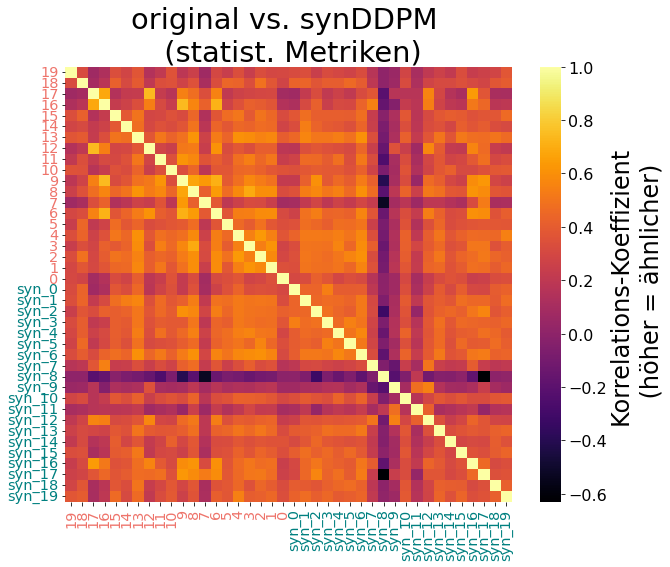

In [26]:
start = 532
range = 40
end_range = start + range

# Assuming correlation_matrix is your correlation matrix

# Select the first 50 rows and 50 columns from the correlation matrix
correlation_matrix_subset2 = correlation_matrix2.iloc[start:end_range, start:end_range]

plt.figure(figsize=(10, 8), facecolor='white')
heatmap = sns.heatmap(correlation_matrix_subset2, cmap='inferno', fmt=".2f",  
                      xticklabels=True, yticklabels=True, cbar=True)

plt.title('original vs. synDDPM \n (statist. Metriken)', fontsize=29, fontweight='medium')
# plt.xlabel('X Label', fontsize=16)  # Increase font size for x-axis label
# plt.ylabel('Y Label', fontsize=16)
plt.xticks(fontsize=14.5, fontweight='medium')
plt.yticks(fontsize=14.5, fontweight='medium')

# Customizing tick labels color
for label in heatmap.get_xticklabels():
    if 'syn_' in label.get_text():
        label.set_color('teal')
    else:
        label.set_color('#ee746b')

for label in heatmap.get_yticklabels():
    if 'syn_' in label.get_text():
        label.set_color('teal')
    else:
        label.set_color('#ee746b')

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Ad(just font size of color bar labels
cbar.set_label('Korrelations-Koeffizient \n (höher = ähnlicher)', fontsize=24)  # Add label to color bar



plt.show()

In [28]:
correlation_dffolder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

#file_name1 = '20240119_OM_privat-19-02.h5'; privat_training = pd.read_csv(os.path.join(folder_path3, file_name1))

file_name1 = 'CondGANOpenMeterprivat_feature.csv'; syngan2 = pd.read_csv(os.path.join(folder_path2, file_name1))

file_name2 = 'ddpm_feature_2019_2021.csv'; synddpm2 = pd.read_csv(os.path.join(folder_path2, file_name2))

file_name3 = 'privat_test_origData_feature.csv'; original2 = pd.read_csv(os.path.join(folder_path2, file_name3))


# Assuming 'df' is your DataFrame
synddpm2 = synddpm2.add_prefix('syn_')
syngan2 = syngan2.add_prefix('syn_')
original2 = original2[original2.columns[::-1]]


In [30]:
concatenated_df = pd.concat([original2, synddpm2], axis=1)
#concatenated_df = pd.concat([original2, syngan2], axis=1)

# Calculate correlation matrix
correlation_matrix2 = concatenated_df.corr()

In [31]:
correlation_df = correlation_matrix2.copy()

In [33]:

# Initialize two dictionaries to store the indices and values
indices_dict = {}
values_dict = {}

# Iterate over columns that start with "syn_"
for column in [col for col in correlation_df.columns if col.startswith('syn_')]:
    # Find the 6 highest values in the column
    top6 = correlation_df[column].nlargest(552*2)
    # Store the indices and values in the respective dictionaries
    indices_dict[column] = top6.index.tolist()
    values_dict[column] = top6.values.tolist()

# Convert the dictionaries into dataframes
df4 = pd.DataFrame(indices_dict)
df5 = pd.DataFrame(values_dict)

# If you need the dataframes to have a specific kind of index or additional formatting, you can adjust them here


In [35]:
results = []

# Iterate through each column in df4
for column in df4.columns:
    exact_match_index = None
    partial_match_index = None
    
    # Remove 'syn_syn_' prefix from the column name for partial match
    partial_column_name = column.replace('syn_', '')
    
    # Iterate through each row in the column
    for index, value in enumerate(df4[column]):
        # Check for exact match
        if value == column:
            exact_match_index = index
        # Check for partial match (value may also contain 'syn_syn_', so we check both with and without)
        elif value == partial_column_name or value.endswith(partial_column_name):
            partial_match_index = index
    
    # Store the results
    results.append([column, exact_match_index, partial_match_index])

# Create a new DataFrame from the results
new_df = pd.DataFrame(results, columns=['Column Name', 'Exact Match Index', 'Partial Match Index'])

# Display the new DataFrame
new_df


,Column Name,Exact Match Index,Partial Match Index
0,syn_001dce72-b1c1-44b1-bf16-0c22cfe3a420,0,809
1,syn_00a3c3e4-bf1f-4c0b-9e18-8bc60e66575d,0,227
2,syn_0252a8f5-9913-47bb-a70f-c86e5c69f71a,0,217
3,syn_026ed97d-d51e-489a-898e-6547d6f569f2,0,273
4,syn_02a7475b-9007-4aef-a265-b38bbdbbec32,0,97
...,...,...,...
547,syn_fe2d90e7-f54f-4b8b-8607-50b18091bd96,0,526
548,syn_fe61333c-b60c-4500-bfa6-0b14db32d6d6,0,401
549,syn_ff029d36-1c57-43fc-922f-2c148c3f6200,0,19
550,syn_ff1e2a8b-cea3-4512-9144-e84263ca6afc,0,603


In [36]:
max_index = new_df['Partial Match Index'].max()

# Replace all NaN values in 'Partial Match Index' with the max_index
new_df['Partial Match Index'].fillna(-1, inplace=True)

In [37]:
# Sort new_df by 'Partial Match Index' in ascending order
new_df_sorted_ascending = new_df.sort_values(by='Partial Match Index').copy()

new_df_sorted_ascending =new_df_sorted_ascending.reset_index(drop=True)

#new_df_sorted_ascending

In [38]:
score = len(new_df_sorted_ascending['Partial Match Index'])   /new_df_sorted_ascending['Partial Match Index'].sum()

In [39]:
new_df_sorted_ascending['Partial Match Index'].fillna(-1, inplace=True)
#new_df_sorted_ascending

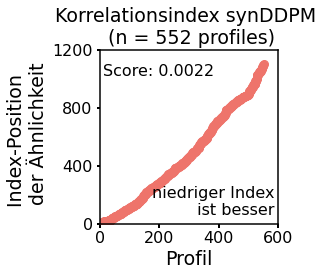

In [40]:
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

# Your data and plotting code
fig, ax = plt.subplots(figsize=(3.2, 3.2))
ax.plot(new_df_sorted_ascending.index, new_df_sorted_ascending['Partial Match Index'], marker='o', label='Partial Match Index', color='#ee746b', markersize=8)
ax.set_title('Korrelationsindex synDDPM \n (n = 552 profiles)', fontsize=19, fontweight='medium')
ax.set_xlabel('Profil', fontsize=19, fontweight='medium')
ax.set_ylabel('Index-Position \n der Ähnlichkeit', fontsize=19, fontweight='medium')
ax.grid(False)
ax.set_xlim(0, 600)
ax.set_ylim(0, 1200)

# Setting major ticks for both axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))  # Change the 100 to adjust spacing between ticks on x-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(400))  # Change the 200 to adjust spacing between ticks on y-axis

# Adjust tick label font size and weight
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.tick_params(axis='both', which='minor', labelsize=10)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

text = "niedriger Index\n ist besser"
plt.text(0.98, 0.05, text, transform=ax.transAxes, ha='right', fontsize=16, color='black')

text = f"Score: {score:.4f}"
plt.text(0.02, 0.85, text, transform=ax.transAxes, ha='left', fontsize=16, color='black')

plt.show()

In [41]:
df = df4

for column in df.columns:
    df[column] = df[column].apply(lambda x: x if not isinstance(x, str) or not x.startswith('syn_') else pd.NA)

def move_up_non_na(column):
    non_na_values = column.dropna()
    column[:] = np.nan
    column[:len(non_na_values)] = non_na_values

# Apply the function to each column
for col in df.columns:
    move_up_non_na(df[col])
    
df4 = df.dropna()

In [42]:
folder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

file_name1 = 'labels_om_privat.csv'; om_label = pd.read_csv(os.path.join(folder_path2, file_name1), index_col=0)

In [ ]:
def replace_with_label(cell_value, om_label):
    """
    Function to replace a cell value in df4 with its corresponding label from om_label.
    
    Args:
    cell_value (str): Value from df4 to be replaced.
    om_label (DataFrame): DataFrame containing id-label mappings.

    Returns:
    str: The corresponding label if found, otherwise returns the original cell_value.
    """
    label = om_label.loc[om_label['id'] == cell_value, 'label']
    if not label.empty:
        return label.values[0]
    else:
        return cell_value

# Example usage:
# Iterate over each cell in df4 and replace the value with its corresponding label from om_label
for column in df4.columns:
    df4[column] = df4[column].apply(lambda x: replace_with_label(x, om_label))


In [44]:
# Initialize an empty dictionary to store the most abundant label for each column
most_abundant_labels = {}

# Iterate over each column in df4
for column in df4.columns:
    # Get the first 11 rows of the column
    first_11 = df4[column].head(11)
    # Count the occurrences of each label
    label_counts = first_11.value_counts()
    # Get the most frequent label
    most_abundant_label = label_counts.idxmax()
    # Store the most frequent label in the dictionary
    most_abundant_labels[column] = most_abundant_label

# Convert the dictionary to a dataframe
syn_to_ori_label2 = pd.DataFrame(list(most_abundant_labels.items()), columns=['column_name', 'label'])



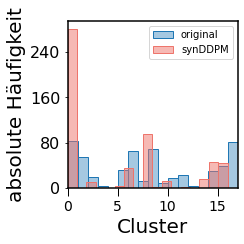

In [45]:
def plot_histogram(df, df2, column, figsize=(10, 3), xlabel='Cluster', ylabel='absolute Häufigkeit',
                   xlim=(0, 17), xtick_fontsize=14, ytick_fontsize=16, xlabel_fontsize=20, ylabel_fontsize=20,
                   tick_length=8, tick_width=1.0, color='tab:blue', color2='#ee746b', edgecolor='none'):

    plt.figure(figsize=figsize)
    sns.histplot(df[column], bins=17, log_scale=False, color=color, edgecolor=color, alpha=0.4, label='original')
    sns.histplot(df2[column], bins=17, log_scale=False, color=color2, edgecolor=color2, alpha=0.5,label='synDDPM')
    
    plt.xlabel(xlabel, fontsize=xlabel_fontsize)
    plt.ylabel(ylabel, fontsize=ylabel_fontsize)
    plt.xlim(*xlim)

    ax = plt.gca()
    ax.grid(True, color='grey', alpha=0.4)

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_locator(MultipleLocator(80))
    
    ax.tick_params(axis='x', which='both', length=tick_length, width=tick_width, labelsize=xtick_fontsize)
    ax.tick_params(axis='y', which='major', labelsize=ytick_fontsize)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set your desired linewidth here
        spine.set_edgecolor('k')  # Set your desired color here

    plt.grid([])
    plt.legend()
    plt.tight_layout()
    # plt.title('Nähestes Cluster', fontsize=20)
    plt.show()
    
plot_histogram(om_label,  syn_to_ori_label2, 'label', figsize=(3.5, 3.3))

# WGAN

In [48]:
folder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

#file_name1 = '20240119_OM_privat-19-02.h5'; privat_training = pd.read_csv(os.path.join(folder_path3, file_name1))

file_name1 = 'CondGANOpenMeterprivat_feature.csv'; syngan = pd.read_csv(os.path.join(folder_path2, file_name1))

file_name2 = 'ddpm_feature_2019_2021.csv'; synddpm = pd.read_csv(os.path.join(folder_path2, file_name2))

file_name3 = 'privat_test_origData_feature.csv'; original = pd.read_csv(os.path.join(folder_path2, file_name3))

In [49]:
# Assuming 'df' is your DataFrame
synddpm = synddpm.add_prefix('syn_')
syngan = syngan.add_prefix('syn_')
original = original[original.columns[::-1]]

In [50]:
concatenated_df = pd.concat([original, syngan], axis=1)
#concatenated_df = pd.concat([original2, syngan2], axis=1)

# Calculate correlation matrix
correlation_matrix = concatenated_df.corr()
# correlation_matrix

In [51]:
correlation_df = correlation_matrix.copy()

indices_dict = {}
values_dict = {}

# Iterate over columns that start with "syn_"
for column in [col for col in correlation_df.columns if col.startswith('syn_')]:
    # Find the 6 highest values in the column
    top6 = correlation_df[column].nlargest(552*2)
    # Store the indices and values in the respective dictionaries
    indices_dict[column] = top6.index.tolist()
    values_dict[column] = top6.values.tolist()

# Convert the dictionaries into dataframes
df4 = pd.DataFrame(indices_dict)
df5 = pd.DataFrame(values_dict)

# If you need the dataframes to have a specific kind of index or additional formatting, you can adjust them here


In [52]:
df = df4

for column in df.columns:
    df[column] = df[column].apply(lambda x: x if not isinstance(x, str) or not x.startswith('syn_') else pd.NA)

def move_up_non_na(column):
    non_na_values = column.dropna()
    column[:] = np.nan
    column[:len(non_na_values)] = non_na_values

# Apply the function to each column
for col in df.columns:
    move_up_non_na(df[col])
    
df4 = df.dropna()

In [54]:
folder_path2 = 'D:\\GWDG\\LSM_Challenge\\Dataset_2024_Mar\\Clustering_metrics_correlation'

file_name1 = 'labels_om_privat.csv'; om_label = pd.read_csv(os.path.join(folder_path2, file_name1), index_col=0)

In [ ]:
def replace_with_label(cell_value, om_label):
    """
    Function to replace a cell value in df4 with its corresponding label from om_label.
    
    Args:
    cell_value (str): Value from df4 to be replaced.
    om_label (DataFrame): DataFrame containing id-label mappings.

    Returns:
    str: The corresponding label if found, otherwise returns the original cell_value.
    """
    label = om_label.loc[om_label['id'] == cell_value, 'label']
    if not label.empty:
        return label.values[0]
    else:
        return cell_value

# Example usage:
# Iterate over each cell in df4 and replace the value with its corresponding label from om_label
for column in df4.columns:
    df4[column] = df4[column].apply(lambda x: replace_with_label(x, om_label))

# Display the updated dataframe
# print(df4)

In [61]:
# Initialize an empty dictionary to store the most abundant label for each column
most_abundant_labels = {}

# Iterate over each column in df4
for column in df4.columns:
    # Get the first 11 rows of the column
    first_11 = df4[column].head(11)
    # Count the occurrences of each label
    label_counts = first_11.value_counts()
    # Get the most frequent label
    most_abundant_label = label_counts.idxmax()
    # Store the most frequent label in the dictionary
    most_abundant_labels[column] = most_abundant_label

# Convert the dictionary to a dataframe
syn_to_ori_label = pd.DataFrame(list(most_abundant_labels.items()), columns=['column_name', 'label'])

In [ ]:
results = []

# Iterate through each column in df4
for column in df4.columns:
    exact_match_index = None
    partial_match_index = None
    
    # Remove 'syn_syn_' prefix from the column name for partial match
    partial_column_name = column.replace('syn_', '')
    
    # Iterate through each row in the column
    for index, value in enumerate(df4[column]):
        # Check for exact match
        if value == column:
            exact_match_index = index
        # Check for partial match (value may also contain 'syn_syn_', so we check both with and without)
        elif value == partial_column_name or value.endswith(partial_column_name):
            partial_match_index = index
    
    # Store the results
    results.append([column, exact_match_index, partial_match_index])

# Create a new DataFrame from the results
new_df = pd.DataFrame(results, columns=['Column Name', 'Exact Match Index', 'Partial Match Index'])

# Display the new DataFrame
#new_df

max_index = new_df['Partial Match Index'].max()

# Replace all NaN values in 'Partial Match Index' with the max_index
new_df['Partial Match Index'].fillna(-1, inplace=True)

In [ ]:
# Sort new_df by 'Partial Match Index' in ascending order
new_df_sorted_ascending = new_df.sort_values(by='Partial Match Index').copy()

new_df_sorted_ascending = new_df_sorted_ascending.reset_index(drop=True)

# To sort in descending order instead, use:
# new_df_sorted_descending = new_df.sort_values(by='Partial Match Index', ascending=False)

# Display the sorted DataFrame
# new_df_sorted_ascending

In [ ]:
score2 = len(new_df_sorted_ascending['Partial Match Index'])   /new_df_sorted_ascending['Partial Match Index'].sum()

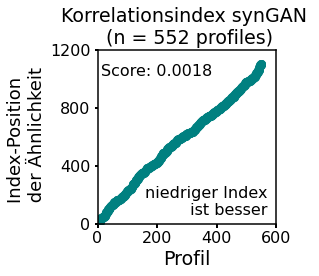

In [ ]:
# Your data and plotting code
fig, ax = plt.subplots(figsize=(3.2, 3.2))
ax.plot(new_df_sorted_ascending.index, new_df_sorted_ascending['Partial Match Index'], marker='o', label='Partial Match Index', color='teal', markersize=8)
ax.set_title('Korrelationsindex synGAN \n (n = 552 profiles)', fontsize=19, fontweight='medium')
ax.set_xlabel('Profil', fontsize=19, fontweight='medium')
ax.set_ylabel('Index-Position \n der Ähnlichkeit', fontsize=18, fontweight='medium')
ax.grid(False)
ax.set_xlim(0, 600)
ax.set_ylim(0, 1200)

# Setting major ticks for both axes
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))  # Change the 100 to adjust spacing between ticks on x-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(400))  # Change the 200 to adjust spacing between ticks on y-axis

# Adjust tick label font size and weight
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.tick_params(axis='both', which='minor', labelsize=10)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

text = "niedriger Index\n ist besser"
plt.text(0.95, 0.05, text, transform=ax.transAxes, ha='right', fontsize=16, color='black')


text = f"Score: {score2:.4f}"
plt.text(0.02, 0.85, text, transform=ax.transAxes, ha='left', fontsize=16, color='black')



plt.show()

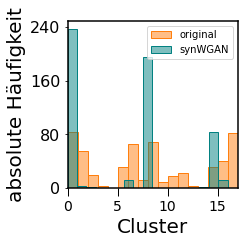

In [ ]:
def plot_histogram(df, df2, column, figsize=(10, 3), xlabel='Cluster', ylabel='absolute Häufigkeit',
                   xlim=(0, 17), xtick_fontsize=14, ytick_fontsize=16, xlabel_fontsize=20, ylabel_fontsize=20,
                   tick_length=8, tick_width=1.0, color='tab:orange', color2='#008080', edgecolor='none'):

    plt.figure(figsize=figsize)
    sns.histplot(df[column], bins=17, log_scale=False, color=color, edgecolor=color, alpha=0.5, label='original')
    sns.histplot(df2[column], bins=17, log_scale=False, color=color2, edgecolor=color2, alpha=0.5,label='synWGAN')
    
    plt.xlabel(xlabel, fontsize=xlabel_fontsize)
    plt.ylabel(ylabel, fontsize=ylabel_fontsize)
    plt.xlim(*xlim)

    ax = plt.gca()
    ax.grid(True, color='grey', alpha=0.4)

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_locator(MultipleLocator(80))
    
    ax.tick_params(axis='x', which='both', length=tick_length, width=tick_width, labelsize=xtick_fontsize)
    ax.tick_params(axis='y', which='major', labelsize=ytick_fontsize)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set your desired linewidth here
        spine.set_edgecolor('k')  # Set your desired color here

    plt.grid([])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_histogram(om_label,  syn_to_ori_label, 'label', figsize=(3.5, 3.3))